<a href="https://colab.research.google.com/github/sabin74/handwritten_digit_recognition/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [123]:
tf.__version__

'2.18.0'

In [124]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [125]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [126]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Visualize Sample Image

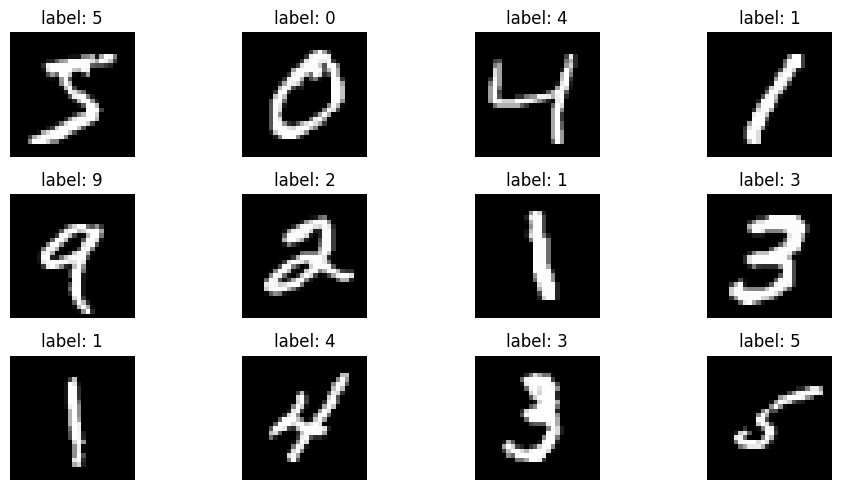

In [127]:
plt.figure(figsize=(10, 5))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'label: {y_train[i]}')
  plt.axis('off')
plt.tight_layout()
plt.show()


Normalize Image Pixel Value


In [128]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Reshape Image for CNN Input

In [129]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [130]:
x_train.shape

(60000, 28, 28, 1)

In [131]:
x_test.shape

(10000, 28, 28, 1)

Convert Labels to OneHot Encoding

In [132]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [133]:
y_train_cat.shape

(60000, 10)

Model Building (CNN with keras)

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [135]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True)

early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [138]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.7464 - loss: 0.7988 - val_accuracy: 0.9655 - val_loss: 0.8852
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9610 - loss: 0.1293 - val_accuracy: 0.9752 - val_loss: 0.1407
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9725 - loss: 0.0924 - val_accuracy: 0.9805 - val_loss: 0.0682
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9791 - loss: 0.0712 - val_accuracy: 0.9838 - val_loss: 0.0500
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9832 - loss: 0.0550 - val_accuracy: 0.9833 - val_loss: 0.0549
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9853 - loss: 0.0466 - val_accuracy: 0.9838 - val_loss: 0.0546
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9858 - loss: 0.0433 - val_accuracy: 0.9890 - val_loss: 0.0410
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9875 - loss: 0.0370 - val_accuracy: 0

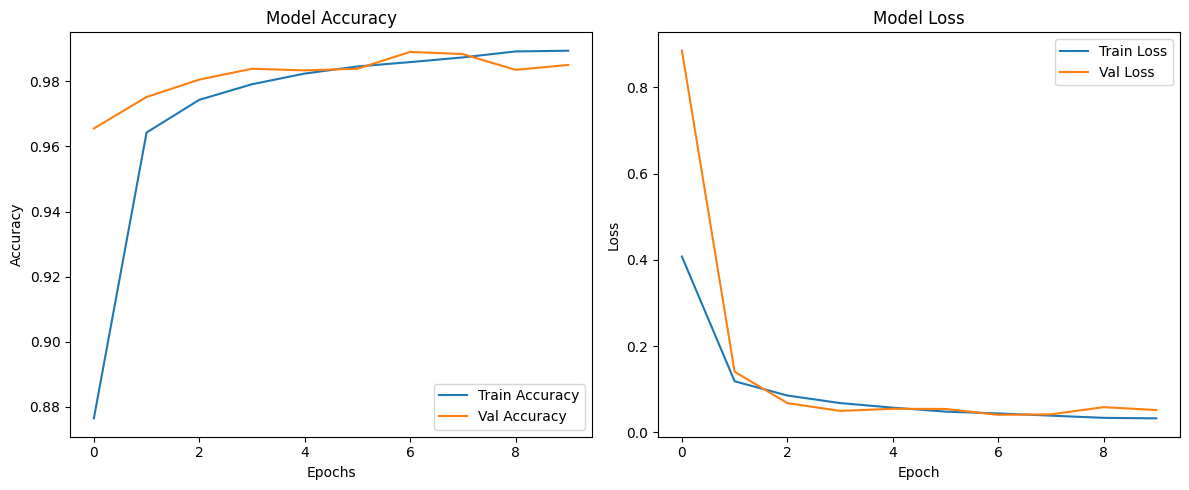

In [139]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [140]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0699


In [141]:
test_loss

0.054921168833971024

In [142]:
test_accuracy

0.9842000007629395

In [143]:
y_probs = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [144]:
y_pred = np.argmax(y_probs, axis=1)

In [145]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Classification Report and Confusion Matrix

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       980\n           1       0.99      1.00      0.99      1135\n           2       0.99      0.97      0.98      1032\n           3       1.00      0.99      0.99      1010\n           4       0.97      1.00      0.98       982\n           5       0.99      0.97      0.98       892\n           6       0.99      0.99      0.99       958\n           7       0.98      0.98      0.98      1028\n           8       0.96      0.99      0.98       974\n           9       0.99      0.97      0.98      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'

In [148]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 967,    0,    0,    0,    6,    0,    2,    2,    0,    3],
       [   0, 1130,    0,    0,    0,    0,    2,    0,    3,    0],
       [   3,    3, 1000,    0,    2,    0,    2,   12,   10,    0],
       [   0,    0,    2,  995,    0,    4,    0,    2,    6,    1],
       [   0,    0,    0,    0,  979,    0,    0,    0,    0,    3],
       [   2,    0,    0,    4,    0,  864,    7,    1,   11,    3],
       [   2,    2,    0,    0,    1,    1,  951,    0,    1,    0],
       [   0,    8,    7,    0,    2,    0,    0, 1007,    3,    1],
       [   0,    0,    1,    0,    4,    0,    0,    0,  968,    1],
       [   1,    1,    0,    0,   15,    2,    1,    0,    8,  981]])

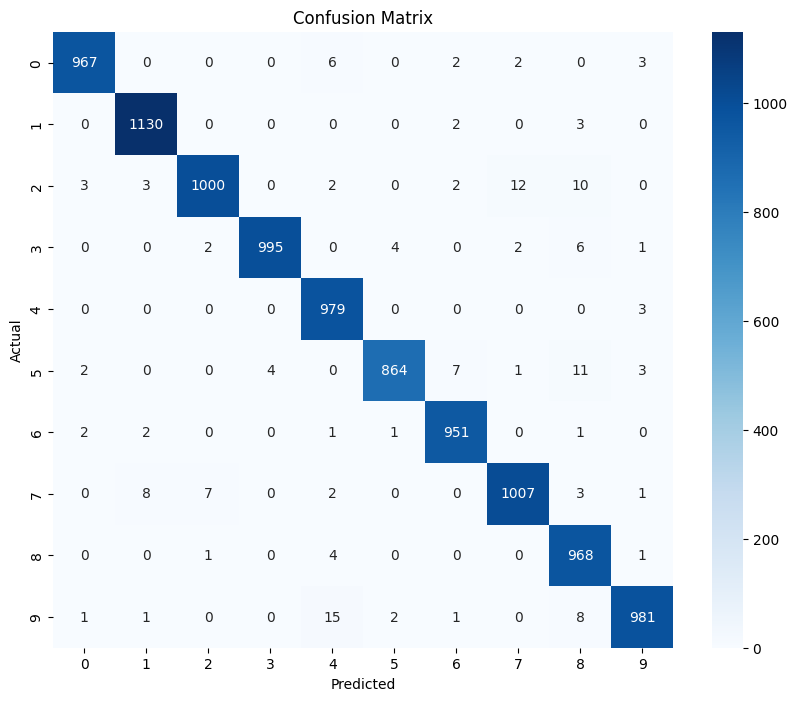

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Visualize True vs Predicted Lable

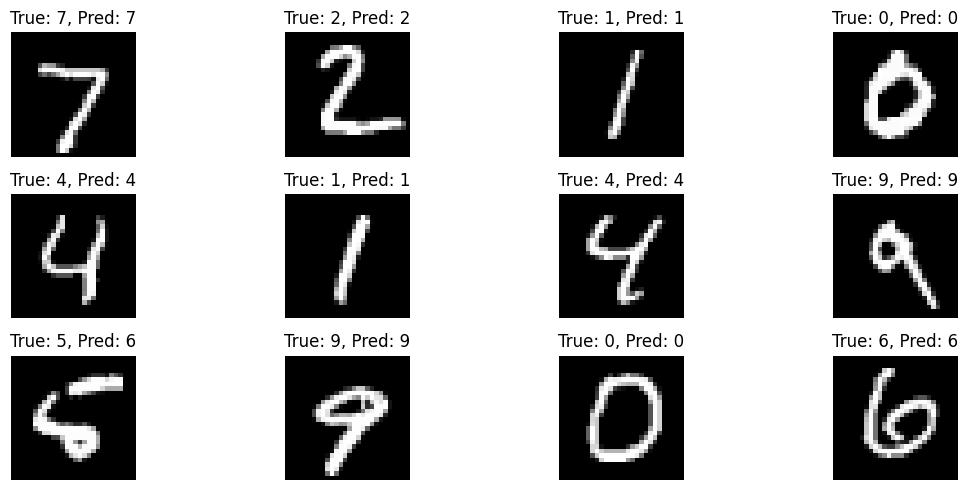

In [150]:
plt.figure(figsize=(12, 5))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

Save the model

In [151]:
model.save("cnn_model.keras")

In [152]:
from tensorflow.keras.models import load_model

In [153]:
loaded_model = load_model('cnn_model.keras')

In [154]:
loss, accuracy = loaded_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9791 - loss: 0.0699


In [155]:
loss

0.054921168833971024

In [156]:
accuracy

0.9842000007629395